James Caldwell, 9/24/25, UVA IRA

This is some summary data that we compiled for UVA's Board of Visitors. They were interested in benchmarking UVA's student to staff ratio vs our peers. We broke down the comparison by Virginia universities and AAU peer universities.

The data came from NCES using the following filters: 
Fall enrollment
   Gender, attendance status, and level of student
	Full time total, Part time total
	Level: total, FT, PT

HR
	Full and part time medical and non medical staff occupational category
		All staff
			GRand total


In [30]:
import pandas as pd
import numpy as np

df = pd.read_csv('Data_9-23-2025 (1).csv')

In [31]:
names = pd.DataFrame(columns=["Original", "New"])
names['Original'] = df.columns
names['New'] = [
    "UnitID",
    "Institution Name",
    "Total employees (EAP2024  All staff)",
    "Full-time employees 2024",
    "Part-time employees 2024",
    "Grand total all students 2024",
    "Full-time students 2024",
    "Part-time students 2024",
    "Grand total undergrad 2024",
    "Full-time undergrad 2024",
    "Part-time undergrad 2024",
    "Grand total graduate/professional 2024",
    "Full-time graduate/professional 2024",
    "Part-time graduate/professional 2024",
    "Total employees (EAP2023  All staff)",
    "Full-time employees 2023",
    "Part-time employees 2023",
    "Grand total all students 2023",
    "Full-time students 2023",
    "Part-time students 2023",
    "Grand total undergrad 2023",
    "Full-time undergrad 2023",
    "Part-time undergrad 2023",
    "Grand total graduate/professional 2023",
    "Full-time graduate/professional 2023",
    "Part-time graduate/professional 2023",
    "Total employees (EAP2022_RV  All staff)",
    "Full-time employees 2022",
    "Part-time employees 2022",
    "Grand total all students 2022",
    "Full-time students 2022",
    "Part-time students 2022",
    "Grand total undergrad 2022",
    "Full-time undergrad 2022",
    "Part-time undergrad 2022",
    "Grand total graduate/professional 2022",
    "Full-time graduate/professional 2022",
    "Part-time graduate/professional 2022",
    "Total employees (EAP2021_RV  All staff)",
    "Full-time employees 2021",
    "Part-time employees 2021",
    "Grand total all students 2021",
    "Full-time students 2021",
    "Part-time students 2021",
    "Grand total undergrad 2021",
    "Full-time undergrad 2021",
    "Part-time undergrad 2021",
    "Grand total graduate/professional 2021",
    "Full-time graduate/professional 2021",
    "Part-time graduate/professional 2021",
    "Total employees (EAP2020_RV  All staff)",
    "Full-time employees 2020",
    "Part-time employees 2020",
    "Grand total all students 2020",
    "Full-time students 2020",
    "Part-time students 2020",
    "Grand total undergrad 2020",
    "Full-time undergrad 2020",
    "Part-time undergrad 2020",
    "Grand total graduate/professional 2020",
    "Full-time graduate/professional 2020",
    "Part-time graduate/professional 2020",
    "Unnamed: 62"
]

df.columns = names['New']


In [ ]:
import pandas as pd

# Function to calculate FTE staff and students for a given year
def calculate_fte(df, year):
    staff_full = f"Full-time employees {year}"
    staff_part = f"Part-time employees {year}"
    stud_full = f"Full-time students {year}"
    stud_part = f"Part-time students {year}"
    
    df[f"Staff_FTE_{year}"] = df[staff_full] + df[staff_part] / 3
    df[f"Students_FTE_{year}"] = df[stud_full] + df[stud_part] / 3
    
    return df

for yr in [2024, 2023, 2022, 2021, 2020]:
    df = calculate_fte(df, yr)

# Keep only Institution Name + new FTE columns
fte_cols = ["Institution Name"] + [col for col in df.columns if "FTE" in col]
df_fte = df[fte_cols].copy()

# print(df_fte.head())


In [ ]:
staff_student_ratios = pd.DataFrame()
staff_student_ratios['Institution Name'] = df_fte['Institution Name']
staff_student_ratios['Staff to Student Ratio 2024'] = df_fte['Staff_FTE_2024'] / df_fte['Students_FTE_2024']
staff_student_ratios['Staff to Student Ratio 2023'] = df_fte['Staff_FTE_2023'] / df_fte['Students_FTE_2023']
staff_student_ratios['Staff to Student Ratio 2022'] = df_fte['Staff_FTE_2022'] / df_fte['Students_FTE_2022']
staff_student_ratios['Staff to Student Ratio 2021'] = df_fte['Staff_FTE_2021'] / df_fte['Students_FTE_2021']
staff_student_ratios['Staff to Student Ratio 2020'] = df_fte['Staff_FTE_2020'] / df_fte['Students_FTE_2020']
staff_student_ratios = staff_student_ratios.round(2)

staff_student_ratios = staff_student_ratios.set_index("Institution Name")

In [ ]:
virginia_list = ['George Mason University', 'James Madison University','University of Virginia-Main Campus','Virginia Commonwealth University','Virginia Polytechnic Institute and State University','William & Mary']
virginia_peers = staff_student_ratios[staff_student_ratios.index.isin(virginia_list)].copy()
non_virginia_peers = staff_student_ratios[~staff_student_ratios.index.isin(virginia_list)].copy()
non_virginia_peers.loc['University of Virginia-Main Campus'] = staff_student_ratios.loc['University of Virginia-Main Campus'] # Add UVA to non-Virginia peers for comparison

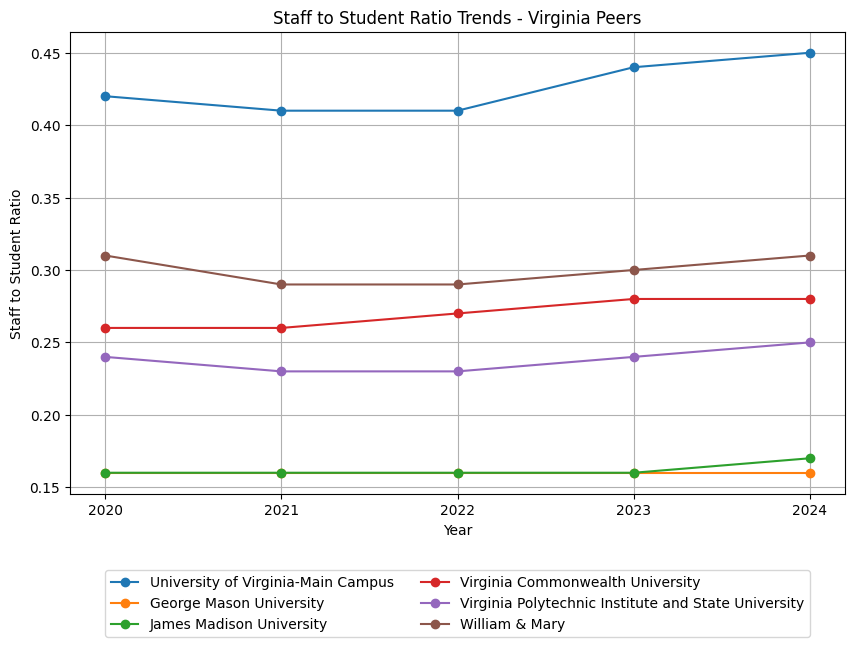

In [ ]:
# Move 'University of Virginia-Main Campus' to the top
uva = virginia_peers.loc[["University of Virginia-Main Campus"]]
others = virginia_peers.drop("University of Virginia-Main Campus")
virginia_peers = pd.concat([uva, others])

uva = non_virginia_peers.loc[["University of Virginia-Main Campus"]]
others = non_virginia_peers.drop("University of Virginia-Main Campus")
non_virginia_peers = pd.concat([uva, others])


import matplotlib.pyplot as plt

# Extract years from column names for x-axis
years = [int(col.split()[-1]) for col in virginia_peers.columns]

plt.figure(figsize=(10,6))

for idx, row in virginia_peers.iterrows():
    plt.plot(years, row.values, marker='o', label=idx)


plt.xlabel("Year")
plt.ylabel("Staff to Student Ratio")
plt.title("Staff to Student Ratio Trends - Virginia Peers")
plt.xticks(years)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)
plt.grid(True)
plt.show()

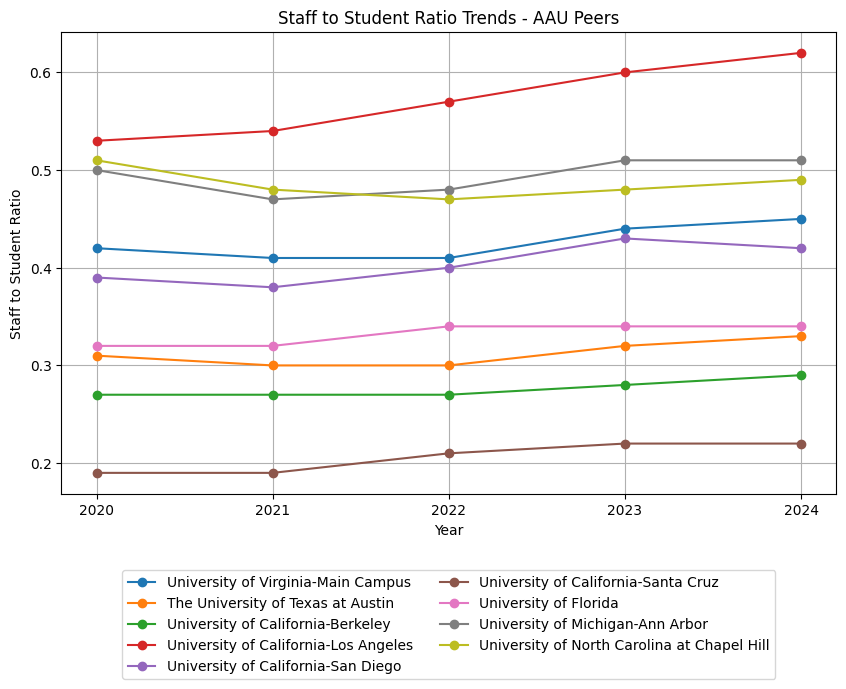

In [50]:
import matplotlib.pyplot as plt

# Extract years from column names for x-axis
years = [int(col.split()[-1]) for col in non_virginia_peers.columns]

plt.figure(figsize=(10,6))

for idx, row in non_virginia_peers.iterrows():
    plt.plot(years, row.values, marker='o', label=idx)

plt.xlabel("Year")
plt.ylabel("Staff to Student Ratio")
plt.title("Staff to Student Ratio Trends - AAU Peers")
plt.xticks(years)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)
plt.grid(True)
plt.show()

In [ ]:
with pd.ExcelWriter('Staff_Student_Ratios.xlsx') as writer:  
    virginia_peers['Staff to Student Ratio 2024'].to_excel(writer, sheet_name='Virginia Peers')  
    non_virginia_peers['Staff to Student Ratio 2024'].to_excel(writer, sheet_name='Non-Virginia Peers')